In [8]:
import os
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import io
import zipfile
import time
from tqdm import tqdm
import seaborn as sns

import matplotlib.ticker as mticker           # Optional: you can print out y axis labels as dollars. 
import numpy as np
import pandas as pd
import gc
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

In [9]:

# Define the folder path
folder_path = 'kaggle/input/nfl-big-data-bowl-2023.zip'
extract_path = 'kaggle/input/nfl-big-data-bowl-2023'

# Check if the extraction directory already exists
if not os.path.exists(extract_path):
    # Unzip the file
    with zipfile.ZipFile(folder_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f"Extracted all files to {extract_path}")
else:
    print(f"Directory {extract_path} already exists, skipping extraction.")

# List all CSV files in the folder
csv_files = [f for f in os.listdir(extract_path) if f.endswith('.csv')]

# Initialize an empty dictionary to store dataframes
dataframes = {}

# Load each CSV file as a separate dataframe with a progress bar
for file in tqdm(csv_files, desc="Loading CSV files", unit="file"):
    file_path = os.path.join(extract_path, file)
    df_name = os.path.splitext(file)[0]
    dataframes[df_name] = pd.read_csv(file_path)

# Convert dictionary to global variables
for key, df in dataframes.items():
    globals()[key] = df

# Display the keys of the dataframes dictionary to verify
print("Loaded DataFrames:", list(dataframes.keys()))

Directory kaggle/input/nfl-big-data-bowl-2023 already exists, skipping extraction.


Loading CSV files:   0%|          | 0/12 [00:00<?, ?file/s]

Loading CSV files: 100%|██████████| 12/12 [00:03<00:00,  3.52file/s]

Loaded DataFrames: ['games', 'week7', 'players', 'week8', 'week2', 'week6', 'week3', 'pffScoutingData', 'plays', 'week1', 'week4', 'week5']


In [10]:
pffScoutingData.head()

,gameId,playId,nflId,pff_role,pff_positionLinedUp,pff_hit,pff_hurry,pff_sack,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,pff_nflIdBlockedPlayer,pff_blockType,pff_backFieldBlock
0,2021090900,97,25511,Pass,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021090900,97,35481,Pass Route,TE-L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021090900,97,35634,Pass Route,LWR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021090900,97,39985,Pass Route,HB-R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021090900,97,40151,Pass Block,C,NaN,NaN,NaN,0.0,0.0,0.0,0.0,44955.0,SW,0.0


In [11]:
pffScoutingData.describe()

,gameId,playId,nflId,pff_hit,pff_hurry,pff_sack,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,pff_nflIdBlockedPlayer,pff_backFieldBlock
count,1.882540e+05,188254.000000,188254.000000,94127.000000,94127.000000,94127.000000,48087.000000,48087.000000,48087.000000,48087.000000,46526.000000,47903.000000
mean,2.021098e+09,2159.218418,45723.528956,0.008956,0.030565,0.006396,0.040427,0.011313,0.043317,0.007694,45178.814340,0.041939
std,4.970192e+03,1222.723324,5016.112999,0.094212,0.172137,0.079717,0.196960,0.105760,0.203573,0.087380,4836.928925,0.200452
min,2.021091e+09,54.000000,25511.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33131.000000,0.000000
25%,2.021092e+09,1127.000000,42445.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42401.000000,0.000000
50%,2.021100e+09,2156.000000,45339.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44877.000000,0.000000
75%,2.021102e+09,3196.000000,48053.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47832.000000,0.000000
max,2.021110e+09,5223.000000,54038.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,53999.000000,1.000000


In [12]:
null_percentage = pffScoutingData.isnull().mean() * 100
print(null_percentage)

gameId                     0.000000
playId                     0.000000
nflId                      0.000000
pff_role                   0.000000
pff_positionLinedUp        0.000000
pff_hit                   50.000000
pff_hurry                 50.000000
pff_sack                  50.000000
pff_beatenByDefender      74.456320
pff_hitAllowed            74.456320
pff_hurryAllowed          74.456320
pff_sackAllowed           74.456320
pff_nflIdBlockedPlayer    75.285519
pff_blockType             74.553529
pff_backFieldBlock        74.554060
dtype: float64


In [13]:
pffScoutingData['pff_positionLinedUp'].unique()

array(['QB', 'TE-L', 'LWR', 'HB-R', 'C', 'RWR', 'LEO', 'LT', 'ROLB', 'LG',
       'RCB', 'SLWR', 'SCBR', 'DRT', 'FS', 'RG', 'LILB', 'RT', 'LCB',
       'RE', 'RLB', 'SCBoL', 'SRoWR', 'DLT', 'SRiWR', 'SCBiL', 'REO',
       'RILB', 'SSR', 'LLB', 'LE', 'LOLB', 'NLT', 'TE-oR', 'TE-iR', 'HB',
       'FSR', 'MLB', 'HB-L', 'TE-R', 'SRWR', 'SCBL', 'NT', 'FSL', 'SSL',
       'NRT', 'SS', 'SLoWR', 'SLiWR', 'SCBiR', 'SCBoR', 'TE-oL', 'TE-iL',
       'FB-L', 'FB', 'FB-R'], dtype=object)

In [14]:
games.head()

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr
0,2021090900,2021,1,09/09/2021,20:20:00,TB,DAL
1,2021091200,2021,1,09/12/2021,13:00:00,ATL,PHI
2,2021091201,2021,1,09/12/2021,13:00:00,BUF,PIT
3,2021091202,2021,1,09/12/2021,13:00:00,CAR,NYJ
4,2021091203,2021,1,09/12/2021,13:00:00,CIN,MIN


In [15]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gameId           122 non-null    int64 
 1   season           122 non-null    int64 
 2   week             122 non-null    int64 
 3   gameDate         122 non-null    object
 4   gameTimeEastern  122 non-null    object
 5   homeTeamAbbr     122 non-null    object
 6   visitorTeamAbbr  122 non-null    object
dtypes: int64(3), object(4)
memory usage: 6.8+ KB


In [16]:
players.head()

,nflId,height,weight,birthDate,collegeName,officialPosition,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,28963,6-5,240,1982-03-02,"Miami, O.",QB,Ben Roethlisberger
2,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
3,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
4,30078,6-2,228,1982-11-24,Harvard,QB,Ryan Fitzpatrick


In [17]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1679 entries, 0 to 1678
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   nflId             1679 non-null   int64 
 1   height            1679 non-null   object
 2   weight            1679 non-null   int64 
 3   birthDate         1447 non-null   object
 4   collegeName       1455 non-null   object
 5   officialPosition  1679 non-null   object
 6   displayName       1679 non-null   object
dtypes: int64(2), object(5)
memory usage: 91.9+ KB


In [18]:
players['officialPosition'].unique()

array(['QB', 'T', 'TE', 'WR', 'DE', 'SS', 'C', 'FS', 'NT', 'DT', 'CB',
       'G', 'OLB', 'RB', 'MLB', 'ILB', 'LB', 'FB', 'DB'], dtype=object)

In [19]:
plays.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,...,foulNFLId3,absoluteYardlineNumber,offenseFormation,personnelO,defendersInBox,personnelD,dropBackType,pff_playAction,pff_passCoverage,pff_passCoverageType
0,2021090900,97,(13:33) (Shotgun) T.Brady pass incomplete deep...,1,3,2,TB,DAL,TB,33,...,NaN,43.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man
1,2021090900,137,(13:18) (Shotgun) D.Prescott pass deep left to...,1,1,10,DAL,TB,DAL,2,...,NaN,108.0,EMPTY,"1 RB, 2 TE, 2 WR",6.0,"4 DL, 4 LB, 3 DB",TRADITIONAL,0,Cover-3,Zone
2,2021090900,187,(12:23) (Shotgun) D.Prescott pass short middle...,1,2,6,DAL,TB,DAL,34,...,NaN,76.0,SHOTGUN,"0 RB, 2 TE, 3 WR",6.0,"3 DL, 3 LB, 5 DB",TRADITIONAL,0,Cover-3,Zone
3,2021090900,282,(9:56) D.Prescott pass incomplete deep left to...,1,1,10,DAL,TB,TB,39,...,NaN,49.0,SINGLEBACK,"1 RB, 2 TE, 2 WR",6.0,"4 DL, 3 LB, 4 DB",TRADITIONAL,1,Cover-3,Zone
4,2021090900,349,(9:46) (Shotgun) D.Prescott pass incomplete sh...,1,3,15,DAL,TB,TB,44,...,NaN,54.0,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,"3 DL, 4 LB, 4 DB",TRADITIONAL,0,Cover-3,Zone


In [20]:
plays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8557 entries, 0 to 8556
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  8557 non-null   int64  
 1   playId                  8557 non-null   int64  
 2   playDescription         8557 non-null   object 
 3   quarter                 8557 non-null   int64  
 4   down                    8557 non-null   int64  
 5   yardsToGo               8557 non-null   int64  
 6   possessionTeam          8557 non-null   object 
 7   defensiveTeam           8557 non-null   object 
 8   yardlineSide            8432 non-null   object 
 9   yardlineNumber          8557 non-null   int64  
 10  gameClock               8557 non-null   object 
 11  preSnapHomeScore        8557 non-null   int64  
 12  preSnapVisitorScore     8557 non-null   int64  
 13  passResult              8557 non-null   object 
 14  penaltyYards            756 non-null    

In [21]:
injuries = plays.query('playDescription.str.contains("injured", case=False)', engine='python')
injuries = injuries['playDescription']
injuries

15      (1:43) (Shotgun) D.Prescott pass short left to...
45      (:28) (Shotgun) D.Prescott scrambles left end ...
49      (14:57) (Shotgun) D.Prescott pass short left t...
109     (2:51) (No Huddle, Shotgun) M.Ryan scrambles l...
185     (1:16) (Shotgun) B.Roethlisberger pass short l...
                              ...                        
8322    (:21) (Shotgun) T.Heinicke pass incomplete sho...
8344    (12:44) J.Winston scrambles left end to NO 12 ...
8431    (:49) (Shotgun) C.Rush pass incomplete deep ri...
8437    (14:07) K.Cousins pass incomplete deep left to...
8518    (:25) (No Huddle, Shotgun) D.Jones pass incomp...
Name: playDescription, Length: 207, dtype: object

In [22]:
len(injuries)

207

In [23]:
207 / 8556

0.024193548387096774

In [24]:
week1.head()

,gameId,playId,nflId,frameId,time,jerseyNumber,team,playDirection,x,y,s,a,dis,o,dir,event
0,2021090900,97,25511.0,1,2021-09-10T00:26:31.100,12.0,TB,right,37.77,24.22,0.29,0.30,0.03,165.16,84.99,NaN
1,2021090900,97,25511.0,2,2021-09-10T00:26:31.200,12.0,TB,right,37.78,24.22,0.23,0.11,0.02,164.33,92.87,NaN
2,2021090900,97,25511.0,3,2021-09-10T00:26:31.300,12.0,TB,right,37.78,24.24,0.16,0.10,0.01,160.24,68.55,NaN
3,2021090900,97,25511.0,4,2021-09-10T00:26:31.400,12.0,TB,right,37.73,24.25,0.15,0.24,0.06,152.13,296.85,NaN
4,2021090900,97,25511.0,5,2021-09-10T00:26:31.500,12.0,TB,right,37.69,24.26,0.25,0.18,0.04,148.33,287.55,NaN


In [25]:
week1['event'].unique()

array([nan, 'ball_snap', 'autoevent_passforward', 'pass_forward',
       'autoevent_ballsnap', 'line_set', 'play_action', 'pass_arrived',
       'autoevent_passinterrupted', 'fumble', 'fumble_offense_recovered',
       'qb_sack', 'run', 'man_in_motion', 'pass_outcome_caught',
       'pass_outcome_incomplete', 'pass_tipped', 'qb_strip_sack', 'shift',
       'first_contact', 'huddle_break_offense', 'lateral', 'handoff'],
      dtype=object)

In [26]:
week1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118122 entries, 0 to 1118121
Data columns (total 16 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   gameId         1118122 non-null  int64  
 1   playId         1118122 non-null  int64  
 2   nflId          1069508 non-null  float64
 3   frameId        1118122 non-null  int64  
 4   time           1118122 non-null  object 
 5   jerseyNumber   1069508 non-null  float64
 6   team           1118122 non-null  object 
 7   playDirection  1118122 non-null  object 
 8   x              1118122 non-null  float64
 9   y              1118122 non-null  float64
 10  s              1118122 non-null  float64
 11  a              1118122 non-null  float64
 12  dis            1118122 non-null  float64
 13  o              1069508 non-null  float64
 14  dir            1069508 non-null  float64
 15  event          89585 non-null    object 
dtypes: float64(9), int64(3), object(4)
memory usage: 136.5

In [27]:
all_weeks = pd.concat([week1, week2, week3, week4, week5, week6, week7, week8], ignore_index=True)
len(all_weeks)

8314178

In [28]:
unique_play_ids_count = all_weeks['playId'].nunique()
print(f"Number of unique playIds in week1: {unique_play_ids_count}")

Number of unique playIds in week1: 3762


In [29]:
len(week1)

1118122

In [30]:
# Sample 10 unique game IDs at random
sampled_game_ids = week1['gameId'].drop_duplicates().sample(n=10, random_state=42)

# Create a new dataframe using only the sampled game IDs
sampled_week1 = week1[week1['gameId'].isin(sampled_game_ids)]

# Display the new dataframe
print(sampled_week1)

             gameId  playId    nflId  frameId                     time  \
0        2021090900      97  25511.0        1  2021-09-10T00:26:31.100   
1        2021090900      97  25511.0        2  2021-09-10T00:26:31.200   
2        2021090900      97  25511.0        3  2021-09-10T00:26:31.300   
3        2021090900      97  25511.0        4  2021-09-10T00:26:31.400   
4        2021090900      97  25511.0        5  2021-09-10T00:26:31.500   
...             ...     ...      ...      ...                      ...   
1118117  2021091300    4845      NaN       30  2021-09-14T03:54:20.600   
1118118  2021091300    4845      NaN       31  2021-09-14T03:54:20.700   
1118119  2021091300    4845      NaN       32  2021-09-14T03:54:20.800   
1118120  2021091300    4845      NaN       33  2021-09-14T03:54:20.900   
1118121  2021091300    4845      NaN       34  2021-09-14T03:54:21.000   

         jerseyNumber      team playDirection      x      y      s     a  \
0                12.0        TB    

In [31]:
unique_play_ids_count = week1['playId'].nunique()
print(f"Number of unique playIds in week1: {unique_play_ids_count}")

Number of unique playIds in week1: 1021


In [32]:
sampled_week1.head()

,gameId,playId,nflId,frameId,time,jerseyNumber,team,playDirection,x,y,s,a,dis,o,dir,event
0,2021090900,97,25511.0,1,2021-09-10T00:26:31.100,12.0,TB,right,37.77,24.22,0.29,0.30,0.03,165.16,84.99,NaN
1,2021090900,97,25511.0,2,2021-09-10T00:26:31.200,12.0,TB,right,37.78,24.22,0.23,0.11,0.02,164.33,92.87,NaN
2,2021090900,97,25511.0,3,2021-09-10T00:26:31.300,12.0,TB,right,37.78,24.24,0.16,0.10,0.01,160.24,68.55,NaN
3,2021090900,97,25511.0,4,2021-09-10T00:26:31.400,12.0,TB,right,37.73,24.25,0.15,0.24,0.06,152.13,296.85,NaN
4,2021090900,97,25511.0,5,2021-09-10T00:26:31.500,12.0,TB,right,37.69,24.26,0.25,0.18,0.04,148.33,287.55,NaN


In [33]:
# Merge only the player name from the players dataframe to sampled_week1
sampled_week1 = sampled_week1.merge(players[['nflId', 'displayName']], on='nflId', how='left')

# Display the updated dataframe
print(sampled_week1.head())

       gameId  playId    nflId  frameId                     time  \
0  2021090900      97  25511.0        1  2021-09-10T00:26:31.100   
1  2021090900      97  25511.0        2  2021-09-10T00:26:31.200   
2  2021090900      97  25511.0        3  2021-09-10T00:26:31.300   
3  2021090900      97  25511.0        4  2021-09-10T00:26:31.400   
4  2021090900      97  25511.0        5  2021-09-10T00:26:31.500   

   jerseyNumber team playDirection      x      y     s     a   dis       o  \
0          12.0   TB         right  37.77  24.22  0.29  0.30  0.03  165.16   
1          12.0   TB         right  37.78  24.22  0.23  0.11  0.02  164.33   
2          12.0   TB         right  37.78  24.24  0.16  0.10  0.01  160.24   
3          12.0   TB         right  37.73  24.25  0.15  0.24  0.06  152.13   
4          12.0   TB         right  37.69  24.26  0.25  0.18  0.04  148.33   

      dir event displayName  
0   84.99   NaN   Tom Brady  
1   92.87   NaN   Tom Brady  
2   68.55   NaN   Tom Brady  
3 

In [34]:
brady_play_97 = sampled_week1.query('playId == 97 & nflId == 25511').copy()

In [35]:
brady_play_97.head()

,gameId,playId,nflId,frameId,time,jerseyNumber,team,playDirection,x,y,s,a,dis,o,dir,event,displayName
0,2021090900,97,25511.0,1,2021-09-10T00:26:31.100,12.0,TB,right,37.77,24.22,0.29,0.30,0.03,165.16,84.99,NaN,Tom Brady
1,2021090900,97,25511.0,2,2021-09-10T00:26:31.200,12.0,TB,right,37.78,24.22,0.23,0.11,0.02,164.33,92.87,NaN,Tom Brady
2,2021090900,97,25511.0,3,2021-09-10T00:26:31.300,12.0,TB,right,37.78,24.24,0.16,0.10,0.01,160.24,68.55,NaN,Tom Brady
3,2021090900,97,25511.0,4,2021-09-10T00:26:31.400,12.0,TB,right,37.73,24.25,0.15,0.24,0.06,152.13,296.85,NaN,Tom Brady
4,2021090900,97,25511.0,5,2021-09-10T00:26:31.500,12.0,TB,right,37.69,24.26,0.25,0.18,0.04,148.33,287.55,NaN,Tom Brady


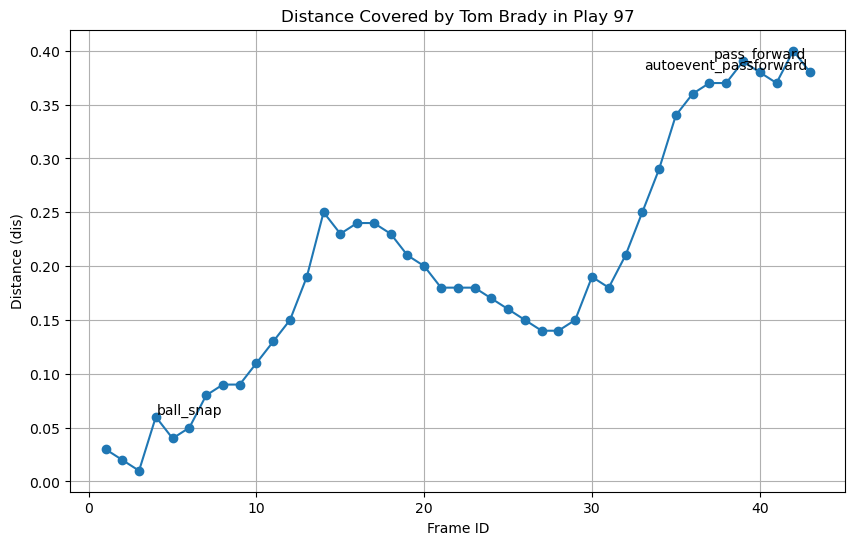

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(brady_play_97['frameId'], brady_play_97['dis'], marker='o')
plt.xlabel('Frame ID')
plt.ylabel('Distance (dis)')
plt.title('Distance Covered by Tom Brady in Play 97')
plt.grid(True)

# Add event tags as markers
for idx, row in brady_play_97.iterrows():
    if pd.notna(row['event']):
        plt.annotate(row['event'], (row['frameId'], row['dis']), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

In [37]:
import random

def random_play_sample(sampled_week1):
    # choose a play and player in that play
    random_playId = random.choice(sampled_week1['playId'])
    player_list = sampled_week1.query('playId == @random_playId')['nflId'].unique()
    random_nflId = random.choice(player_list)
    random_play = sampled_week1.query('playId == @random_playId & nflId == @random_nflId')
    #print the player name
    player_name = random_play['displayName'].unique()
    print(f"Player Name: {player_name[0]}")
    #plot the distance covered
    plt.figure(figsize=(10, 6))
    plt.plot(random_play['frameId'], random_play['dis'], marker='o')
    plt.xlabel('Frame ID')
    plt.ylabel('Distance (dis)')
    plt.title(f'Distance Covered by {player_name[0]} in Play {random_playId}')
    plt.tight_layout()
    plt.grid(True)
    # add event tags as markers with slight offset
    for idx, row in random_play.iterrows():
        if pd.notna(row['event']):
            plt.annotate(row['event'], (row['frameId'], row['dis']), textcoords="offset points", xytext=(5,10), ha='center')
    plt.show()
    print(random_play.head())

Player Name: Fred Warner


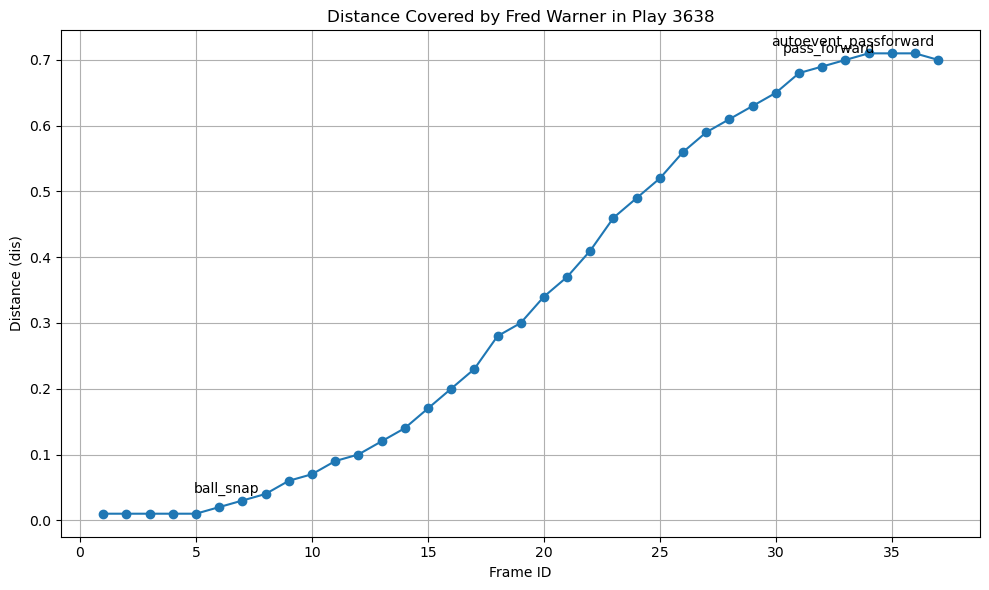

            gameId  playId    nflId  frameId                     time  \
295607  2021091204    3638  46139.0        1  2021-09-12T19:52:43.900   
295608  2021091204    3638  46139.0        2  2021-09-12T19:52:44.000   
295609  2021091204    3638  46139.0        3  2021-09-12T19:52:44.100   
295610  2021091204    3638  46139.0        4  2021-09-12T19:52:44.200   
295611  2021091204    3638  46139.0        5  2021-09-12T19:52:44.300   

        jerseyNumber team playDirection      x      y     s     a   dis     o  \
295607          54.0   SF          left  91.19  28.57  0.00  0.00  0.01  85.6   
295608          54.0   SF          left  91.19  28.58  0.00  0.00  0.01  85.6   
295609          54.0   SF          left  91.19  28.58  0.00  0.00  0.01  85.6   
295610          54.0   SF          left  91.20  28.59  0.02  0.53  0.01  85.6   
295611          54.0   SF          left  91.21  28.59  0.12  1.21  0.01  85.6   

          dir event  displayName  
295607  23.84   NaN  Fred Warner  
2956

In [38]:
random_play_sample(sampled_week1)

In [39]:
brady_play_97.to_csv('brady_play_97.csv', index=False)

In [40]:
brady_play_97_grouped = brady_play_97.groupby('playId').agg({
    's': ['mean', 'max', 'std'],
    'a': ['mean', 'max', 'std'],
    'x': ['min', 'max', 'mean'],
    'y': ['min', 'max', 'mean']
})
print(brady_play_97_grouped)

              s                        a                      x         \
           mean   max      std      mean   max       std    min    max   
playId                                                                   
97      1.97186  3.89  1.15562  1.328372  2.81  0.730039  32.07  37.78   

                       y                    
             mean    min    max       mean  
playId                                      
97      35.134651  19.54  24.26  23.283023  


In [41]:
brady_play_97_grouped

s                        a                      x         \
           mean   max      std      mean   max       std    min    max   
playId                                                                   
97      1.97186  3.89  1.15562  1.328372  2.81  0.730039  32.07  37.78   

                       y                    
             mean    min    max       mean  
playId                                      
97      35.134651  19.54  24.26  23.283023

In [42]:
sampled_week1 = sampled_week1.merge(players[['nflId', 'officialPosition']], on='nflId', how='left')
sampled_week1.head()


,gameId,playId,nflId,frameId,time,jerseyNumber,team,playDirection,x,y,s,a,dis,o,dir,event,displayName,officialPosition
0,2021090900,97,25511.0,1,2021-09-10T00:26:31.100,12.0,TB,right,37.77,24.22,0.29,0.30,0.03,165.16,84.99,NaN,Tom Brady,QB
1,2021090900,97,25511.0,2,2021-09-10T00:26:31.200,12.0,TB,right,37.78,24.22,0.23,0.11,0.02,164.33,92.87,NaN,Tom Brady,QB
2,2021090900,97,25511.0,3,2021-09-10T00:26:31.300,12.0,TB,right,37.78,24.24,0.16,0.10,0.01,160.24,68.55,NaN,Tom Brady,QB
3,2021090900,97,25511.0,4,2021-09-10T00:26:31.400,12.0,TB,right,37.73,24.25,0.15,0.24,0.06,152.13,296.85,NaN,Tom Brady,QB
4,2021090900,97,25511.0,5,2021-09-10T00:26:31.500,12.0,TB,right,37.69,24.26,0.25,0.18,0.04,148.33,287.55,NaN,Tom Brady,QB


In [43]:
sampled_week1_individual_grouped = sampled_week1.groupby(['gameId', 'playId', 'nflId', 'displayName', 'officialPosition']).agg({
    's': ['mean', 'max', 'std'],
    'a': ['mean', 'max', 'std'],
    'x': ['min', 'max', 'mean'],
    'y': ['min', 'max', 'mean']
})

In [44]:
sampled_week1_individual_grouped

s        \
                                                                 mean   max   
gameId     playId nflId   displayName      officialPosition                   
2021090900 97     25511.0 Tom Brady        QB                1.971860  3.89   
                  35481.0 Rob Gronkowski   TE                4.358140  6.60   
                  35634.0 Antonio Brown    WR                4.036047  7.19   
                  39985.0 Giovani Bernard  RB                2.312558  5.82   
                  40151.0 Ryan Jensen      C                 1.868605  3.92   
...                                                               ...   ...   
2021091300 4845   52436.0 Patrick Queen    MLB               2.674118  4.44   
                  52506.0 Malik Harrison   OLB               3.980588  7.22   
                  52517.0 John Simpson     G                 1.377353  2.91   
                  53446.0 Alex Leatherwood T                 1.447353  2.83   
                  53460.0 Odafe Oweh       OLB               2.148529  3.97   

                                                                       \
                                                                  std   
gameId     playId nflId   displayName      officialPosition             
2021090900 97     25511.0 Tom Brady        QB                1.155620   
                  35481.0 Rob Gronkowski   TE                2.079566   
                  35634.0 Antonio Brown    WR                2.226259   
                  39985.0 Giovani Bernard  RB                2.273893   
                  40151.0 Ryan Jensen      C                 1.126741   
...                                                               ...   
2021091300 4845   52436.0 Patrick Queen    MLB               1.494479   
                  52506.0 Malik Harrison   OLB               2.854607   
                  52517.0 John Simpson     G                 0.916410   
                  53446.0 Alex Leatherwood T                 1.138791   
                  53460.0 Odafe Oweh       OLB               1.399745   

                                                                    a        \
                                                                 mean   max   
gameId     playId nflId   displayName      officialPosition                   
2021090900 97     25511.0 Tom Brady        QB                1.328372  2.81   
                  35481.0 Rob Gronkowski   TE                1.493953  3.44   
                  35634.0 Antonio Brown    WR                3.115349  5.79   
                  39985.0 Giovani Bernard  RB                1.472093  2.94   
                  40151.0 Ryan Jensen      C                 1.016279  2.13   
...                                                               ...   ...   
2021091300 4845   52436.0 Patrick Queen    MLB               1.707353  3.37   
                  52506.0 Malik Harrison   OLB               1.938235  4.24   
                  52517.0 John Simpson     G                 0.667059  1.48   
                  53446.0 Alex Leatherwood T                 0.647941  1.66   
                  53460.0 Odafe Oweh       OLB               1.881765  3.80   

                                                                           x  \
                                                                  std    min   
gameId     playId nflId   displayName      officialPosition                    
2021090900 97     25511.0 Tom Brady        QB                0.730039  32.07   
                  35481.0 Rob Gronkowski   TE                0.715183  41.08   
                  35634.0 Antonio Brown    WR                1.433068  40.99   
                  39985.0 Giovani Bernard  RB                1.058444  36.65   
                  40151.0 Ryan Jensen      C                 0.494017  35.43   
...                                                               ...    ...   
2021091300 4845   52436.0 Patrick Queen    MLB               0.856598  36.92   
                  52506.0 Malik

In [45]:
sampled_week1_individual_grouped_reset = sampled_week1_individual_grouped.reset_index()
sampled_week1_individual_grouped_reset

gameId playId    nflId       displayName officialPosition  \
                                                                       
0      2021090900     97  25511.0         Tom Brady               QB   
1      2021090900     97  35481.0    Rob Gronkowski               TE   
2      2021090900     97  35634.0     Antonio Brown               WR   
3      2021090900     97  39985.0   Giovani Bernard               RB   
4      2021090900     97  40151.0       Ryan Jensen                C   
...           ...    ...      ...               ...              ...   
16935  2021091300   4845  52436.0     Patrick Queen              MLB   
16936  2021091300   4845  52506.0    Malik Harrison              OLB   
16937  2021091300   4845  52517.0      John Simpson                G   
16938  2021091300   4845  53446.0  Alex Leatherwood                T   
16939  2021091300   4845  53460.0        Odafe Oweh              OLB   

              s                         a                      x         \
           mean   max       std      mean   max       std    min    max   
0      1.971860  3.89  1.155620  1.328372  2.81  0.730039  32.07  37.78   
1      4.358140  6.60  2.079566  1.493953  3.44  0.715183  41.08  47.82   
2      4.036047  7.19  2.226259  3.115349  5.79  1.433068  40.99  55.21   
3      2.312558  5.82  2.273893  1.472093  2.94  1.058444  36.65  38.58   
4      1.868605  3.92  1.126741  1.016279  2.13  0.494017  35.43  42.18   
...         ...   ...       ...       ...   ...       ...    ...    ...   
16935  2.674118  4.44  1.494479  1.707353  3.37  0.856598  36.92  44.97   
16936  3.980588  7.22  2.854607  1.938235  4.24  1.435955  39.64  50.39   
16937  1.377353  2.91  0.916410  0.667059  1.48  0.430543  41.82  46.42   
16938  1.447353  2.83  1.138791  0.647941  1.66  0.483884  41.48  44.76   
16939  2.148529  3.97  1.399745  1.881765  3.80  1.111320  39.48  44.49   

                      y                    
            mean    min    max       mean  
0      35.134651  19.54  24.26  23.283023  
1      43.985581  29.15  46.17  35.393488  
2      47.317674  36.73  42.56  39.865116  
3      37.446512  13.66  22.56  20.475349  
4      39.601860  20.54  24.66  23.624419  
...          ...    ...    ...        ...  
16935  39.736176  24.25  27.34  25.374118  
16936  43.176176  14.00  22.05  16.520882  
16937  43.408824  22.07  23.13  22.273529  
16938  42.447059  23.25  27.14  25.910000  
16939  41.542941  22.55  27.84  25.632059  

[16940 rows x 17 columns]

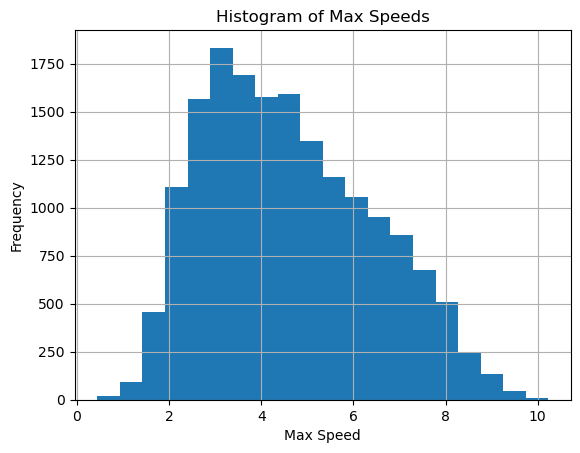

In [46]:

# If the column is nested as ('s', 'max'):
sampled_week1_individual_grouped_reset[('s', 'max')].hist(bins=20)
plt.title("Histogram of Max Speeds")
plt.xlabel("Max Speed")
plt.ylabel("Frequency")
plt.show()

In [47]:
sampled_week1_individual_grouped_reset

gameId playId    nflId       displayName officialPosition  \
                                                                       
0      2021090900     97  25511.0         Tom Brady               QB   
1      2021090900     97  35481.0    Rob Gronkowski               TE   
2      2021090900     97  35634.0     Antonio Brown               WR   
3      2021090900     97  39985.0   Giovani Bernard               RB   
4      2021090900     97  40151.0       Ryan Jensen                C   
...           ...    ...      ...               ...              ...   
16935  2021091300   4845  52436.0     Patrick Queen              MLB   
16936  2021091300   4845  52506.0    Malik Harrison              OLB   
16937  2021091300   4845  52517.0      John Simpson                G   
16938  2021091300   4845  53446.0  Alex Leatherwood                T   
16939  2021091300   4845  53460.0        Odafe Oweh              OLB   

              s                         a                      x         \
           mean   max       std      mean   max       std    min    max   
0      1.971860  3.89  1.155620  1.328372  2.81  0.730039  32.07  37.78   
1      4.358140  6.60  2.079566  1.493953  3.44  0.715183  41.08  47.82   
2      4.036047  7.19  2.226259  3.115349  5.79  1.433068  40.99  55.21   
3      2.312558  5.82  2.273893  1.472093  2.94  1.058444  36.65  38.58   
4      1.868605  3.92  1.126741  1.016279  2.13  0.494017  35.43  42.18   
...         ...   ...       ...       ...   ...       ...    ...    ...   
16935  2.674118  4.44  1.494479  1.707353  3.37  0.856598  36.92  44.97   
16936  3.980588  7.22  2.854607  1.938235  4.24  1.435955  39.64  50.39   
16937  1.377353  2.91  0.916410  0.667059  1.48  0.430543  41.82  46.42   
16938  1.447353  2.83  1.138791  0.647941  1.66  0.483884  41.48  44.76   
16939  2.148529  3.97  1.399745  1.881765  3.80  1.111320  39.48  44.49   

                      y                    
            mean    min    max       mean  
0      35.134651  19.54  24.26  23.283023  
1      43.985581  29.15  46.17  35.393488  
2      47.317674  36.73  42.56  39.865116  
3      37.446512  13.66  22.56  20.475349  
4      39.601860  20.54  24.66  23.624419  
...          ...    ...    ...        ...  
16935  39.736176  24.25  27.34  25.374118  
16936  43.176176  14.00  22.05  16.520882  
16937  43.408824  22.07  23.13  22.273529  
16938  42.447059  23.25  27.14  25.910000  
16939  41.542941  22.55  27.84  25.632059  

[16940 rows x 17 columns]

In [48]:
# Flatten the multi-index into single strings
sampled_week1_individual_grouped_reset.columns = ['_'.join(col) if isinstance(col, tuple) else col 
                  for col in sampled_week1_individual_grouped_reset.columns]

In [49]:
sampled_week1_individual_grouped_reset

,gameId_,playId_,nflId_,displayName_,officialPosition_,s_mean,s_max,s_std,a_mean,a_max,a_std,x_min,x_max,x_mean,y_min,y_max,y_mean
0,2021090900,97,25511.0,Tom Brady,QB,1.971860,3.89,1.155620,1.328372,2.81,0.730039,32.07,37.78,35.134651,19.54,24.26,23.283023
1,2021090900,97,35481.0,Rob Gronkowski,TE,4.358140,6.60,2.079566,1.493953,3.44,0.715183,41.08,47.82,43.985581,29.15,46.17,35.393488
2,2021090900,97,35634.0,Antonio Brown,WR,4.036047,7.19,2.226259,3.115349,5.79,1.433068,40.99,55.21,47.317674,36.73,42.56,39.865116
3,2021090900,97,39985.0,Giovani Bernard,RB,2.312558,5.82,2.273893,1.472093,2.94,1.058444,36.65,38.58,37.446512,13.66,22.56,20.475349
4,2021090900,97,40151.0,Ryan Jensen,C,1.868605,3.92,1.126741,1.016279,2.13,0.494017,35.43,42.18,39.601860,20.54,24.66,23.624419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16935,2021091300,4845,52436.0,Patrick Queen,MLB,2.674118,4.44,1.494479,1.707353,3.37,0.856598,36.92,44.97,39.736176,24.25,27.34,25.374118
16936,2021091300,4845,52506.0,Malik Harrison,OLB,3.980588,7.22,2.854607,1.938235,4.24,1.435955,39.64,50.39,43.176176,14.00,22.05,16.520882
16937,2021091300,4845,52517.0,John Simpson,G,1.377353,2.91,0.916410,0.667059,1.48,0.430543,41.82,46.42,43.408824,22.07,23.13,22.273529
16938,2021091300,4845,53446.0,Alex Leatherwood,T,1.447353,2.83,1.138791,0.647941,1.66,0.483884,41.48,44.76,42.447059,23.25,27.14,25.910000


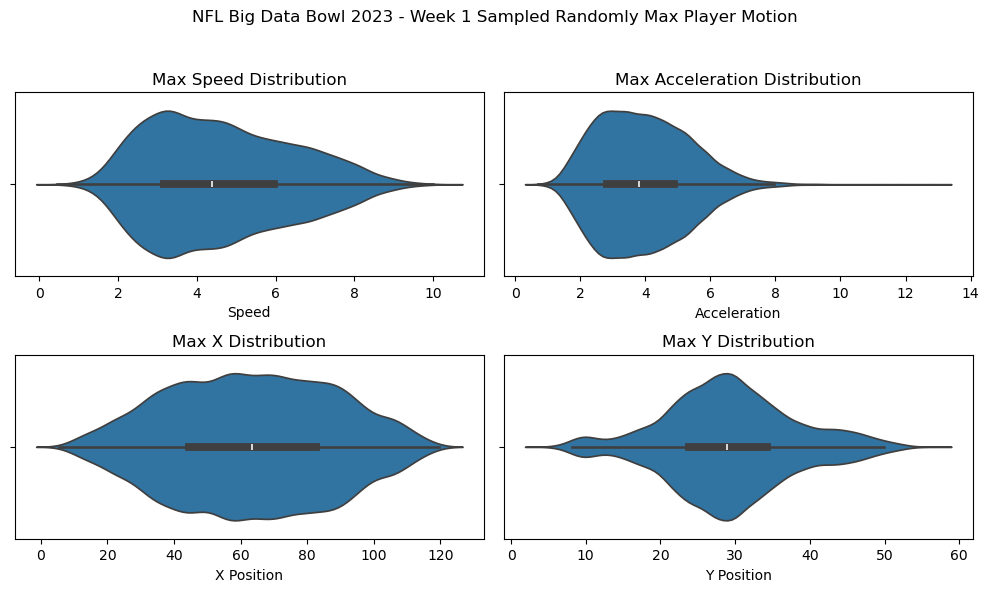

In [50]:
# Set an overall theme/style
# Create a 2x2 figure
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Plot histogram for Max Speed
sns.violinplot(data=sampled_week1_individual_grouped_reset, x='s_max', ax=axes[0, 0])
axes[0, 0].set_title("Max Speed Distribution")
axes[0, 0].set_xlabel("Speed")

# Plot histogram for Max Acceleration
sns.violinplot(data=sampled_week1_individual_grouped_reset, x='a_max', ax=axes[0, 1])
axes[0, 1].set_title("Max Acceleration Distribution")
axes[0, 1].set_xlabel("Acceleration")


# Plot histogram for Max X
sns.violinplot(data=sampled_week1_individual_grouped_reset, x='x_max', ax=axes[1, 0])
axes[1, 0].set_title("Max X Distribution")
axes[1, 0].set_xlabel("X Position")


# Plot histogram for Max Y
sns.violinplot(data=sampled_week1_individual_grouped_reset, x='y_max', ax=axes[1, 1])
axes[1, 1].set_title("Max Y Distribution")
axes[1, 1].set_xlabel("Y Position")

# Adjust spacing
plt.suptitle("NFL Big Data Bowl 2023 - Week 1 Sampled Randomly Max Player Motion")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [51]:
sampled_week1_cb_vs_ol = sampled_week1_individual_grouped_reset.query('officialPosition_ == "CB" | officialPosition_ == "WR"')
sampled_week1_cb_vs_ol.head()

,gameId_,playId_,nflId_,displayName_,officialPosition_,s_mean,s_max,s_std,a_mean,a_max,a_std,x_min,x_max,x_mean,y_min,y_max,y_mean
2,2021090900,97,35634.0,Antonio Brown,WR,4.036047,7.19,2.226259,3.115349,5.79,1.433068,40.99,55.21,47.317674,36.73,42.56,39.865116
5,2021090900,97,41233.0,Mike Evans,WR,4.370233,7.43,2.822279,2.510233,4.87,1.648898,42.01,47.07,44.355349,16.19,33.47,21.833953
11,2021090900,97,43478.0,Anthony Brown,CB,3.267442,7.05,2.436234,2.735116,5.26,1.588093,43.49,55.68,48.607209,37.55,43.10,40.210465
12,2021090900,97,44896.0,Chris Godwin,WR,5.495814,8.45,1.905554,1.995116,3.49,0.808468,40.07,54.37,46.057209,19.68,36.72,30.133953
13,2021090900,97,44904.0,Jourdan Lewis,CB,4.835116,8.24,2.263515,1.780000,4.07,0.771041,44.50,55.40,47.995116,21.06,37.78,31.271628


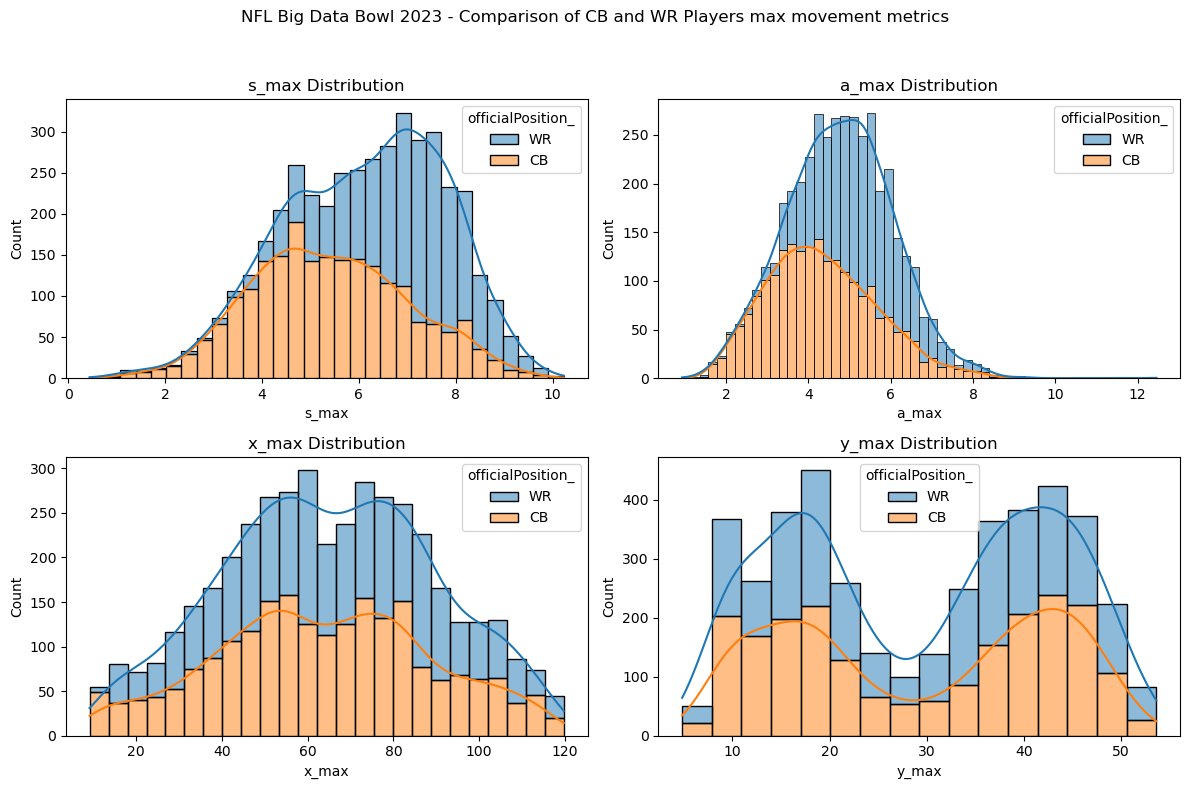

In [52]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("NFL Big Data Bowl 2023 - Comparison of CB and WR Players max movement metrics")

for ax, col in zip(axes.flatten(), ['s_max', 'a_max', 'x_max', 'y_max']):
    sns.histplot(data=sampled_week1_cb_vs_ol, x=col, hue='officialPosition_', multiple='stack', ax=ax, kde=True)
    ax.set_title(f"{col} Distribution")
    ax.set_xlabel(col)
    #ax.legend(title='Position', labels=['CB', 'OL'])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

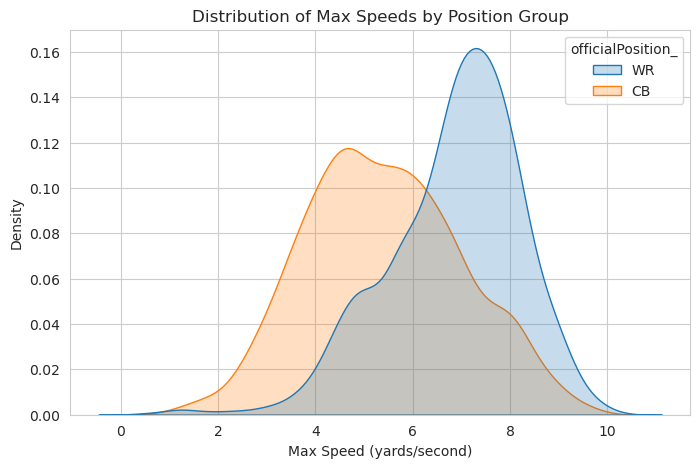

In [53]:
# Optional: set a style
sns.set_style("whitegrid")

# Suppose your DataFrame is called `df` and it has:
# - A numeric column named "max_speed"
# - A categorical column named "position_group" (e.g., Cornerbacks, Wide Receivers, Other)

plt.figure(figsize=(8, 5))
sns.kdeplot(
    data=sampled_week1_cb_vs_ol,
    x="s_max",
    hue="officialPosition_",  # separate curves by position group
    fill=True,            # set to True if you want filled density areas,
    common_norm=True     # if you want each distribution scaled independently
)

plt.title("Distribution of Max Speeds by Position Group")
plt.xlabel("Max Speed (yards/second)")
plt.ylabel("Density")
#plt.legend()
plt.show()

In [54]:
plays.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,...,foulNFLId3,absoluteYardlineNumber,offenseFormation,personnelO,defendersInBox,personnelD,dropBackType,pff_playAction,pff_passCoverage,pff_passCoverageType
0,2021090900,97,(13:33) (Shotgun) T.Brady pass incomplete deep...,1,3,2,TB,DAL,TB,33,...,NaN,43.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man
1,2021090900,137,(13:18) (Shotgun) D.Prescott pass deep left to...,1,1,10,DAL,TB,DAL,2,...,NaN,108.0,EMPTY,"1 RB, 2 TE, 2 WR",6.0,"4 DL, 4 LB, 3 DB",TRADITIONAL,0,Cover-3,Zone
2,2021090900,187,(12:23) (Shotgun) D.Prescott pass short middle...,1,2,6,DAL,TB,DAL,34,...,NaN,76.0,SHOTGUN,"0 RB, 2 TE, 3 WR",6.0,"3 DL, 3 LB, 5 DB",TRADITIONAL,0,Cover-3,Zone
3,2021090900,282,(9:56) D.Prescott pass incomplete deep left to...,1,1,10,DAL,TB,TB,39,...,NaN,49.0,SINGLEBACK,"1 RB, 2 TE, 2 WR",6.0,"4 DL, 3 LB, 4 DB",TRADITIONAL,1,Cover-3,Zone
4,2021090900,349,(9:46) (Shotgun) D.Prescott pass incomplete sh...,1,3,15,DAL,TB,TB,44,...,NaN,54.0,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,"3 DL, 4 LB, 4 DB",TRADITIONAL,0,Cover-3,Zone


In [55]:
plays.columns

Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'defensiveTeam', 'yardlineSide', 'yardlineNumber',
       'gameClock', 'preSnapHomeScore', 'preSnapVisitorScore', 'passResult',
       'penaltyYards', 'prePenaltyPlayResult', 'playResult', 'foulName1',
       'foulNFLId1', 'foulName2', 'foulNFLId2', 'foulName3', 'foulNFLId3',
       'absoluteYardlineNumber', 'offenseFormation', 'personnelO',
       'defendersInBox', 'personnelD', 'dropBackType', 'pff_playAction',
       'pff_passCoverage', 'pff_passCoverageType'],
      dtype='object')

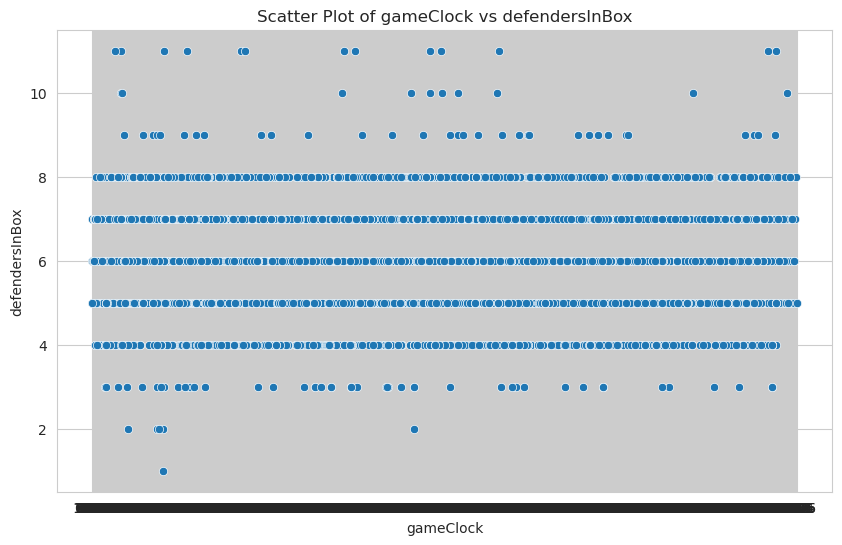

In [56]:
import random
df_columns = ['quarter', 'down', 'gameClock', 'penaltyYards', 'playResults', 'absoluteYardlineNumber', 'playType', 'defendersInBox']

def plot_random_columns(df):
    # Pick two random columns
    columns = random.sample(list(df_columns), 2)
    
    # Plot the columns
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=plays, x=columns[0], y=columns[1])
    plt.xlabel(columns[0])
    plt.ylabel(columns[1])
    plt.title(f"Scatter Plot of {columns[0]} vs {columns[1]}")
    plt.show()

# Example usage
plot_random_columns(plays)

In [57]:
plays['playResult'].unique()

array([  0,  28,   5,  10,  19,  16,   8,  12,   7,  22,  27,  17,   2,
        14,   6,   4,  13,  47,  11, -12, -10,   1,   3,  20,   9,  21,
        31,  24,  18,  -5, -14,  -3,  -1,  -8,  -7,  37,  26,  -6,  -2,
        -9,  35,  15,  57, -11,  25,  40,  50,  34,  32,  23,  29,  79,
        33,  52,  30,  41, -13,  69,  38, -18,  44,  43,  -4,  75,  36,
        55,  42,  67,  56, -15,  49, -16,  91,  61,  64,  77,  51,  63,
        68,  46, -27,  39, -20, -24,  58,  54,  53, -34,  76,  45, -17,
        70,  59, -25,  62,  72,  71,  48,  82, -19,  84,  73])

In [58]:
plays.columns

Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'defensiveTeam', 'yardlineSide', 'yardlineNumber',
       'gameClock', 'preSnapHomeScore', 'preSnapVisitorScore', 'passResult',
       'penaltyYards', 'prePenaltyPlayResult', 'playResult', 'foulName1',
       'foulNFLId1', 'foulName2', 'foulNFLId2', 'foulName3', 'foulNFLId3',
       'absoluteYardlineNumber', 'offenseFormation', 'personnelO',
       'defendersInBox', 'personnelD', 'dropBackType', 'pff_playAction',
       'pff_passCoverage', 'pff_passCoverageType'],
      dtype='object')

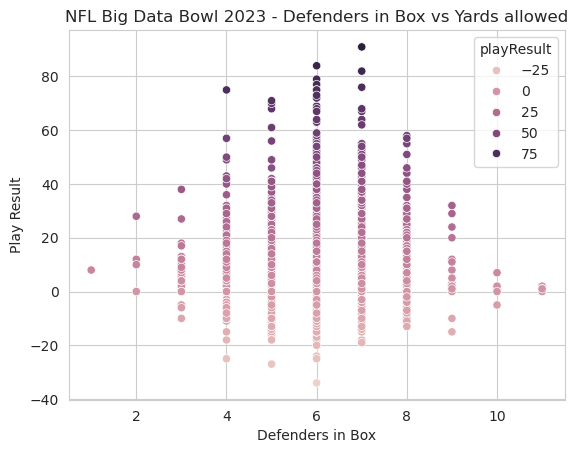

In [59]:
fig, axes = plt.gca(), plt.gca()
sns.scatterplot(data=plays, x='defendersInBox', y='playResult', hue='playResult', ax=axes)
axes.set_xlabel("Defenders in Box")
axes.set_ylabel("Play Result")
axes.set_title("NFL Big Data Bowl 2023 - Defenders in Box vs Yards allowed")
plt.show()

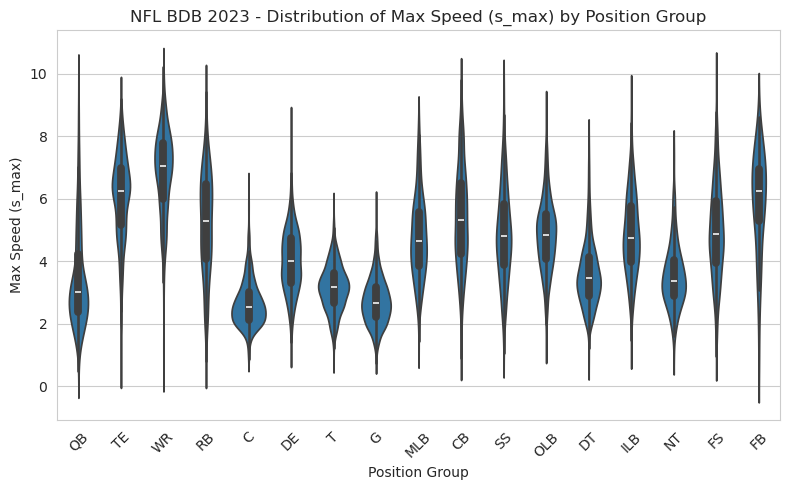

In [60]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='officialPosition_', y='s_max', data=sampled_week1_individual_grouped_reset)
plt.title('NFL BDB 2023 - Distribution of Max Speed (s_max) by Position Group')
plt.xlabel('Position Group')
plt.ylabel('Max Speed (s_max)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [61]:
sampled_week1_individual_grouped_reset.columns

Index(['gameId_', 'playId_', 'nflId_', 'displayName_', 'officialPosition_',
       's_mean', 's_max', 's_std', 'a_mean', 'a_max', 'a_std', 'x_min',
       'x_max', 'x_mean', 'y_min', 'y_max', 'y_mean'],
      dtype='object')

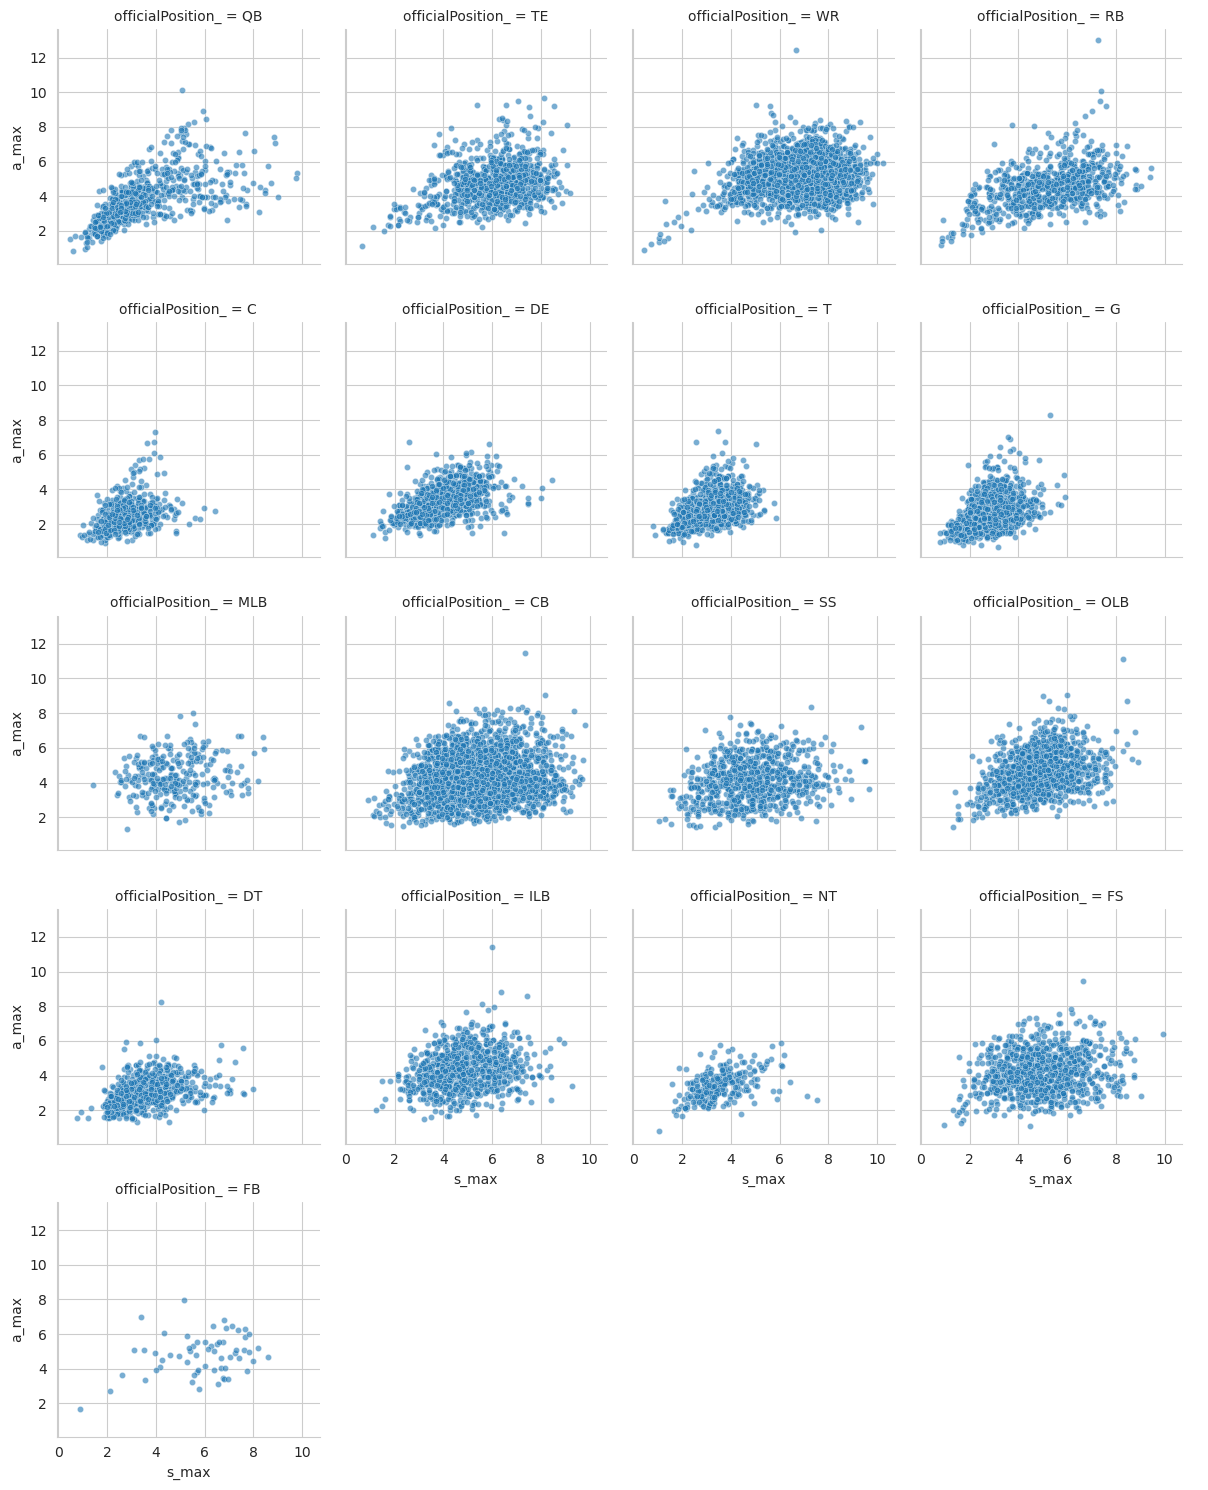

In [62]:
g = sns.FacetGrid(sampled_week1_individual_grouped_reset, col="officialPosition_", col_wrap=4)
g.map_dataframe(sns.scatterplot, x="s_max", y="a_max", alpha=0.6, s=20)
g.add_legend()

<Axes: xlabel='s_max', ylabel='a_max'>

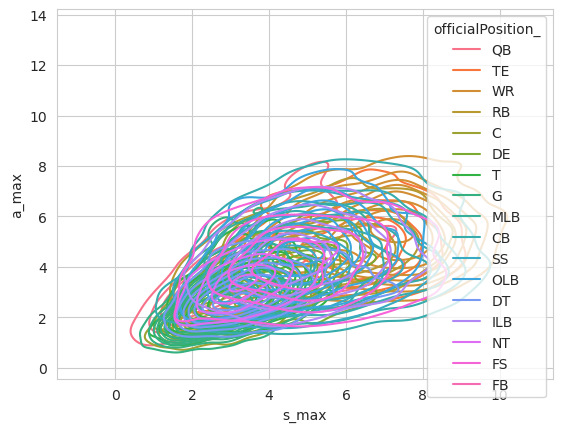

In [63]:
sns.kdeplot(
    data=sampled_week1_individual_grouped_reset,
    x="s_max",
    y="a_max",
    hue="officialPosition_",
    fill=False
)

In [64]:
pffScoutingData.head()

,gameId,playId,nflId,pff_role,pff_positionLinedUp,pff_hit,pff_hurry,pff_sack,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,pff_nflIdBlockedPlayer,pff_blockType,pff_backFieldBlock
0,2021090900,97,25511,Pass,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021090900,97,35481,Pass Route,TE-L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021090900,97,35634,Pass Route,LWR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021090900,97,39985,Pass Route,HB-R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021090900,97,40151,Pass Block,C,NaN,NaN,NaN,0.0,0.0,0.0,0.0,44955.0,SW,0.0


In [65]:
pffScoutingData = pffScoutingData.merge(players[['nflId', 'displayName', 'officialPosition']], on='nflId', how='left')

In [66]:
pffScoutingData['officialPosition'].unique()

array(['QB', 'TE', 'WR', 'RB', 'C', 'DE', 'T', 'G', 'MLB', 'CB', 'SS',
       'OLB', 'DT', 'ILB', 'NT', 'FS', 'FB', 'LB', 'DB'], dtype=object)

In [67]:
plays.columns

Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'defensiveTeam', 'yardlineSide', 'yardlineNumber',
       'gameClock', 'preSnapHomeScore', 'preSnapVisitorScore', 'passResult',
       'penaltyYards', 'prePenaltyPlayResult', 'playResult', 'foulName1',
       'foulNFLId1', 'foulName2', 'foulNFLId2', 'foulName3', 'foulNFLId3',
       'absoluteYardlineNumber', 'offenseFormation', 'personnelO',
       'defendersInBox', 'personnelD', 'dropBackType', 'pff_playAction',
       'pff_passCoverage', 'pff_passCoverageType'],
      dtype='object')

In [68]:
sampled_week1['event'].unique()

array([nan, 'ball_snap', 'autoevent_passforward', 'pass_forward',
       'autoevent_ballsnap', 'line_set', 'play_action', 'pass_arrived',
       'autoevent_passinterrupted', 'fumble', 'fumble_offense_recovered',
       'qb_sack', 'run', 'man_in_motion', 'pass_outcome_caught',
       'pass_outcome_incomplete', 'pass_tipped', 'qb_strip_sack', 'shift',
       'first_contact'], dtype=object)

In [69]:
plays['pff_passCoverageType'].unique()

array(['Man', 'Zone', 'Other'], dtype=object)

In [70]:
plays['pff_passCoverageType'].value_counts()

pff_passCoverageType
Zone     5588
Man      2481
Other     488
Name: count, dtype: int64

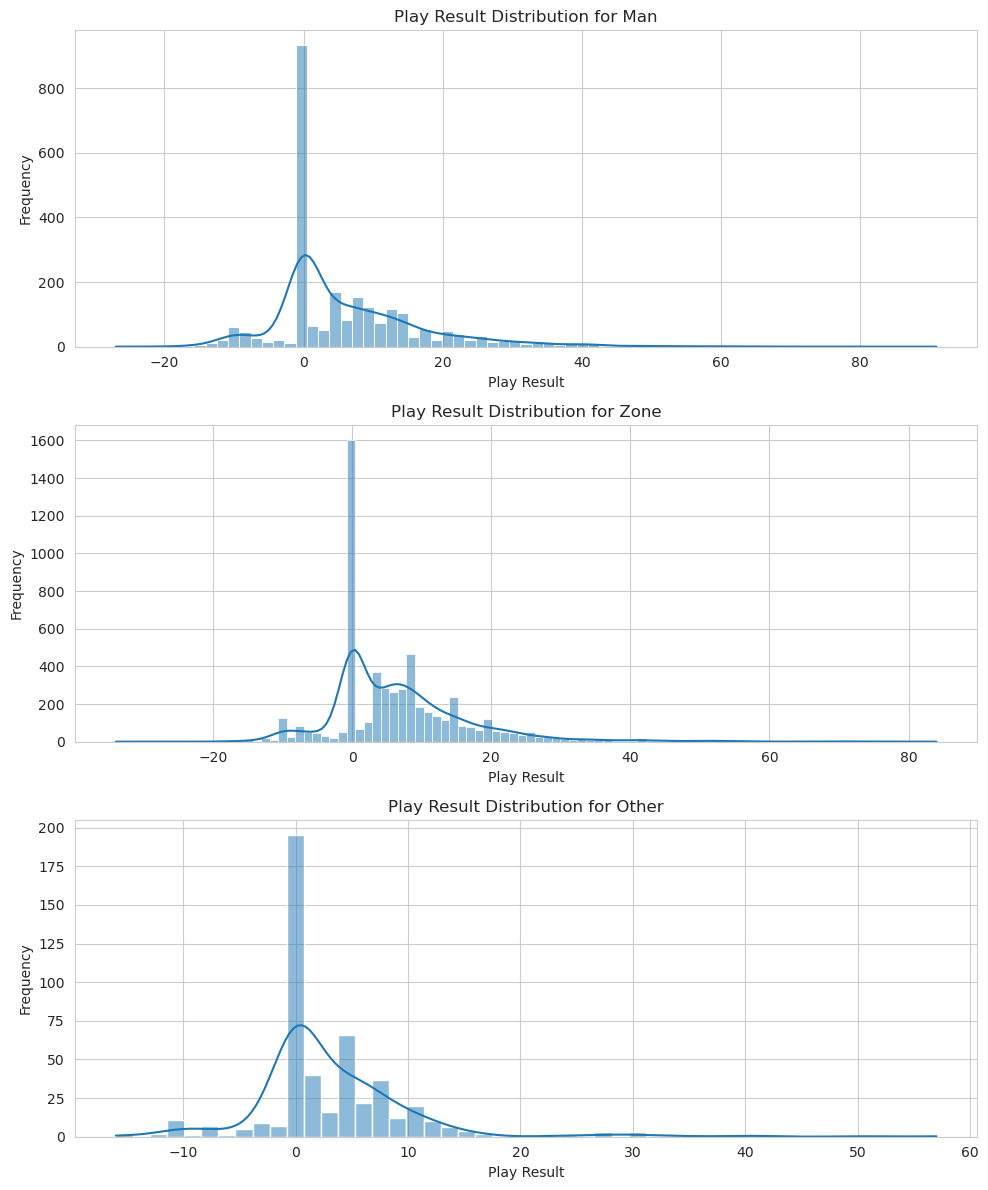

In [71]:
# Filter out rows with missing values in 'pff_passCoverageType' or 'playResult'
plays_filtered = plays.dropna(subset=['pff_passCoverageType', 'playResult'])

# Create a figure with subplots
unique_pass_coverage_types = plays_filtered['pff_passCoverageType'].unique()
num_plots = len(unique_pass_coverage_types)
fig, axes = plt.subplots(num_plots, 1, figsize=(10, num_plots * 4))

# Plot histograms for each unique pass coverage type
for ax, coverage_type in zip(axes, unique_pass_coverage_types):
    sns.histplot(data=plays_filtered[plays_filtered['pff_passCoverageType'] == coverage_type], x='playResult', ax=ax, kde=True)
    ax.set_title(f'Play Result Distribution for {coverage_type}')
    ax.set_xlabel('Play Result')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [72]:
plays.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,...,foulNFLId3,absoluteYardlineNumber,offenseFormation,personnelO,defendersInBox,personnelD,dropBackType,pff_playAction,pff_passCoverage,pff_passCoverageType
0,2021090900,97,(13:33) (Shotgun) T.Brady pass incomplete deep...,1,3,2,TB,DAL,TB,33,...,NaN,43.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man
1,2021090900,137,(13:18) (Shotgun) D.Prescott pass deep left to...,1,1,10,DAL,TB,DAL,2,...,NaN,108.0,EMPTY,"1 RB, 2 TE, 2 WR",6.0,"4 DL, 4 LB, 3 DB",TRADITIONAL,0,Cover-3,Zone
2,2021090900,187,(12:23) (Shotgun) D.Prescott pass short middle...,1,2,6,DAL,TB,DAL,34,...,NaN,76.0,SHOTGUN,"0 RB, 2 TE, 3 WR",6.0,"3 DL, 3 LB, 5 DB",TRADITIONAL,0,Cover-3,Zone
3,2021090900,282,(9:56) D.Prescott pass incomplete deep left to...,1,1,10,DAL,TB,TB,39,...,NaN,49.0,SINGLEBACK,"1 RB, 2 TE, 2 WR",6.0,"4 DL, 3 LB, 4 DB",TRADITIONAL,1,Cover-3,Zone
4,2021090900,349,(9:46) (Shotgun) D.Prescott pass incomplete sh...,1,3,15,DAL,TB,TB,44,...,NaN,54.0,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,"3 DL, 4 LB, 4 DB",TRADITIONAL,0,Cover-3,Zone


In [73]:
import pandas as pd

# Create a contingency table (cross-tabulation)
cont_table = pd.crosstab(plays['offenseFormation'], plays['pff_passCoverage'])

# Display the contingency table
print(cont_table)

pff_passCoverage  2-Man  Bracket  Cover-0  Cover-1  Cover-2  Cover-3  Cover-6  \
offenseFormation                                                                
EMPTY                23       11       54      330      164      386      119   
I_FORM                2        0        7       59       40      126       27   
JUMBO                 0        0        2        4        1        3        0   
PISTOL                0        0        8       21       19       64       12   
SHOTGUN             169       35      169     1355      715     1548      564   
SINGLEBACK            5        0       30      238      146      537       83   
WILDCAT               0        0        0        1        0        0        0   

pff_passCoverage  Goal Line  Miscellaneous  Prevent  Quarters  Red Zone  
offenseFormation                                                         
EMPTY                     0              2        5       225        77  
I_FORM                    3              0      

In [74]:
cont_table

pff_passCoverage,2-Man,Bracket,Cover-0,Cover-1,Cover-2,Cover-3,Cover-6,Goal Line,Miscellaneous,Prevent,Quarters,Red Zone
offenseFormation,,,,,,,,,,,,
EMPTY,23,11,54,330,164,386,119,0,2,5,225,77
I_FORM,2,0,7,59,40,126,27,3,0,0,23,11
JUMBO,0,0,2,4,1,3,0,16,0,0,1,3
PISTOL,0,0,8,21,19,64,12,0,0,0,19,11
SHOTGUN,169,35,169,1355,715,1548,564,4,6,27,664,225
SINGLEBACK,5,0,30,238,146,537,83,2,0,0,99,49
WILDCAT,0,0,0,1,0,0,0,0,0,0,1,0


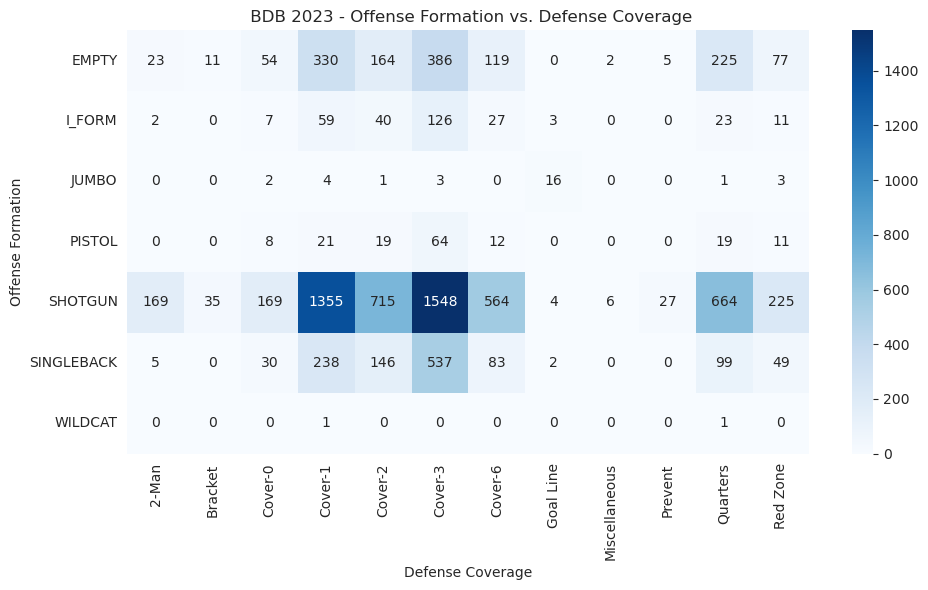

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# `annot=True` will print the cell counts. 
# `fmt='d'` ensures they are formatted as integers.
sns.heatmap(cont_table, annot=True, fmt='d', cmap='Blues')

plt.title(" BDB 2023 - Offense Formation vs. Defense Coverage")
plt.ylabel("Offense Formation")
plt.xlabel("Defense Coverage")
plt.tight_layout()
plt.show()

In [77]:
pffScoutingData.head()

,gameId,playId,nflId,pff_role,pff_positionLinedUp,pff_hit,pff_hurry,pff_sack,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,pff_nflIdBlockedPlayer,pff_blockType,pff_backFieldBlock,displayName,officialPosition
0,2021090900,97,25511,Pass,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tom Brady,QB
1,2021090900,97,35481,Pass Route,TE-L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rob Gronkowski,TE
2,2021090900,97,35634,Pass Route,LWR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Antonio Brown,WR
3,2021090900,97,39985,Pass Route,HB-R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Giovani Bernard,RB
4,2021090900,97,40151,Pass Block,C,NaN,NaN,NaN,0.0,0.0,0.0,0.0,44955.0,SW,0.0,Ryan Jensen,C


In [78]:
sampled_week1_individual_grouped_reset

,gameId_,playId_,nflId_,displayName_,officialPosition_,s_mean,s_max,s_std,a_mean,a_max,a_std,x_min,x_max,x_mean,y_min,y_max,y_mean
0,2021090900,97,25511.0,Tom Brady,QB,1.971860,3.89,1.155620,1.328372,2.81,0.730039,32.07,37.78,35.134651,19.54,24.26,23.283023
1,2021090900,97,35481.0,Rob Gronkowski,TE,4.358140,6.60,2.079566,1.493953,3.44,0.715183,41.08,47.82,43.985581,29.15,46.17,35.393488
2,2021090900,97,35634.0,Antonio Brown,WR,4.036047,7.19,2.226259,3.115349,5.79,1.433068,40.99,55.21,47.317674,36.73,42.56,39.865116
3,2021090900,97,39985.0,Giovani Bernard,RB,2.312558,5.82,2.273893,1.472093,2.94,1.058444,36.65,38.58,37.446512,13.66,22.56,20.475349
4,2021090900,97,40151.0,Ryan Jensen,C,1.868605,3.92,1.126741,1.016279,2.13,0.494017,35.43,42.18,39.601860,20.54,24.66,23.624419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16935,2021091300,4845,52436.0,Patrick Queen,MLB,2.674118,4.44,1.494479,1.707353,3.37,0.856598,36.92,44.97,39.736176,24.25,27.34,25.374118
16936,2021091300,4845,52506.0,Malik Harrison,OLB,3.980588,7.22,2.854607,1.938235,4.24,1.435955,39.64,50.39,43.176176,14.00,22.05,16.520882
16937,2021091300,4845,52517.0,John Simpson,G,1.377353,2.91,0.916410,0.667059,1.48,0.430543,41.82,46.42,43.408824,22.07,23.13,22.273529
16938,2021091300,4845,53446.0,Alex Leatherwood,T,1.447353,2.83,1.138791,0.647941,1.66,0.483884,41.48,44.76,42.447059,23.25,27.14,25.910000
